In [1]:
!pip install scikit-misc

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import linalg
from sklearn.metrics.pairwise import pairwise_kernels
plt.style.use('ggplot')
from skmisc.loess import loess

Now, we can load the data at data.csv and turn it into the predictor X and the target y

Read the data

In [4]:
data= pd.read_csv('data.csv', header=None)
data= data.rename(columns={0:'X', 1:'y'})
print(data)

           X         y
0   0.008207  0.008207
1   0.014153  0.014153
2   0.015596  0.015596
3   0.024421  0.024421
4   0.036852  0.036852
..       ...       ...
95  0.971750  2.858749
96  0.974303  2.871516
97  0.986877  2.934386
98  0.993229  2.966146
99  0.993969  2.969845

[100 rows x 2 columns]


In [5]:
# Reshaping the dataset
X = np.array(data.X.to_list()).reshape((-1,1))
y = np.array(data.y.to_list())

Create a scatterplot of the data. 

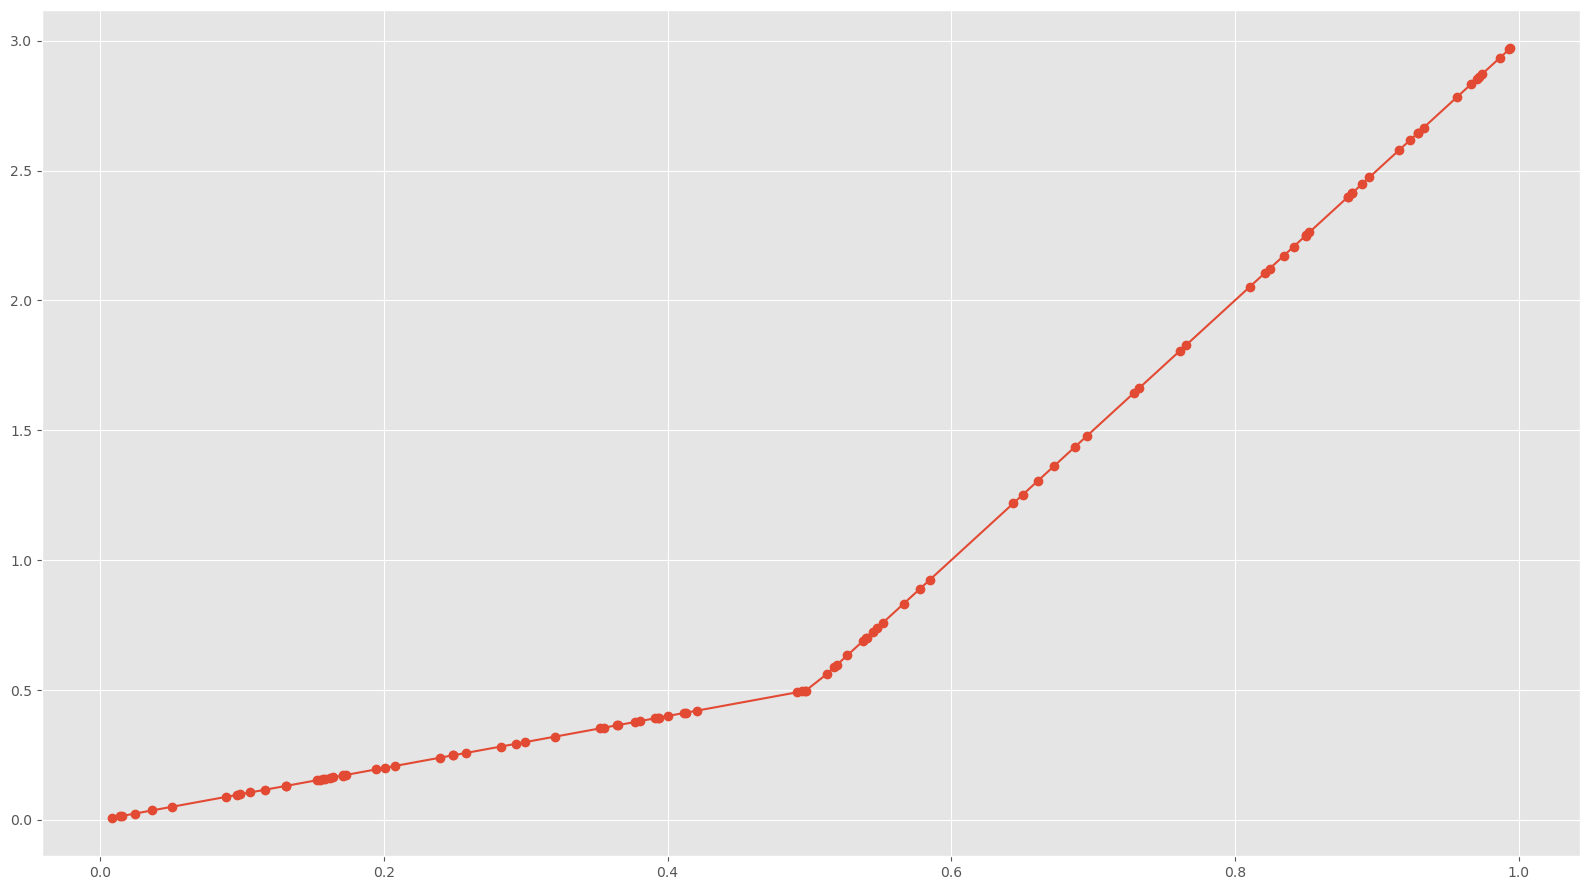

In [6]:
# plotting the data
plt.figure(figsize=(16,9))
plt.plot(X,y, '-o')
plt.tight_layout()

The Plot that has been generated is non-linear but can we can see some pice-wise linearity in the plot. The variables X and y seem to be positively correlated, moreover, the plot seems to take a steep raise from the approximate point of 0.5 on the x-axis

We now define the kernels $K_1,...,K_4$ as

In [7]:
def K1(x, x_):
    return 1

def K2(x, x_, lam):
    
    return (1 - abs((x-x_)/lam)**3)**3

def K3(x, x_, lam):
    
    return np.exp(-lam*(x-x_)**2)

def K4(x, x_, L):
    
    boundary_tuple_lower_extrema = (0,1/L)    # subsituting l=1 in the given inequality
    boundary_tuple_upper_extrema = (1-1/L,1)  # subsituting l=L in the given inequality
    
    condition1 = x < boundary_tuple_lower_extrema[-1] and x >= boundary_tuple_lower_extrema[0]
    condition2 = x_ < boundary_tuple_lower_extrema[-1] and x_ >= boundary_tuple_lower_extrema[0]
    
    condition3 = x < boundary_tuple_upper_extrema[-1] and x >= boundary_tuple_upper_extrema[0]
    condition4 = x_ < boundary_tuple_upper_extrema[-1] and x_ >= boundary_tuple_upper_extrema[0]
    
    if condition1 and condition2 and condition3 and condition4:
        return 1
    else:
        return 0

To write the function which takes $X, y$ and a kernel $K$ as input, we can do the following

In [8]:
lam = 1 
L= 2

In [27]:
def pred(X, y, K):
    # Start by computing the matrix of all weights we'll need at once.
    

    
    # Now, for each point we can compute the model using the corresponding weights, and make a prediction.
    model = loess(X, y)
    model.fit()

    # Return a vector of the predictions at each point in X.
    y_hat = model.predict(X)
    return y_hat


Test run prediction without kernel

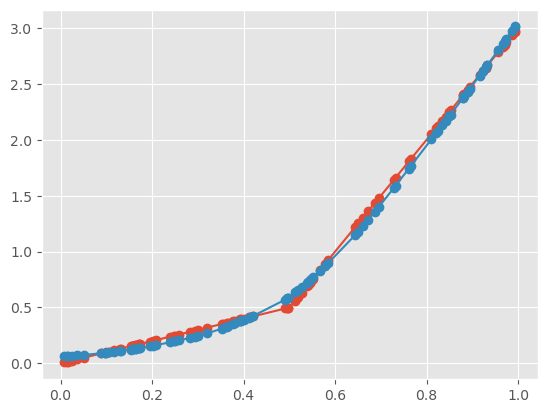

In [28]:
y_hat = pred(X,y,K1)
plt.plot(X,y, '-o') #in red
plt.plot(X,y_hat.values, '-o') # in blue

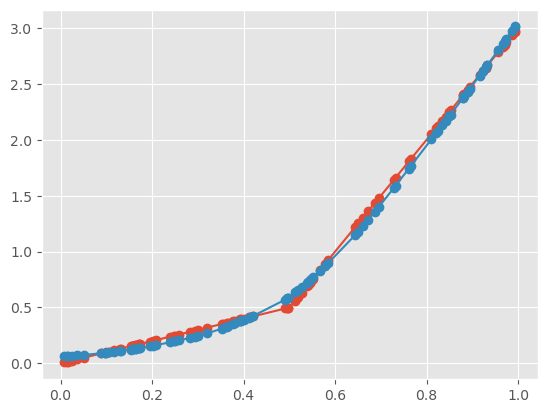

In [30]:
y_hat2 = pred(X,y,K2)
plt.plot(X,y, '-o') #in red
plt.plot(X,y_hat.values, '-o') # in blue

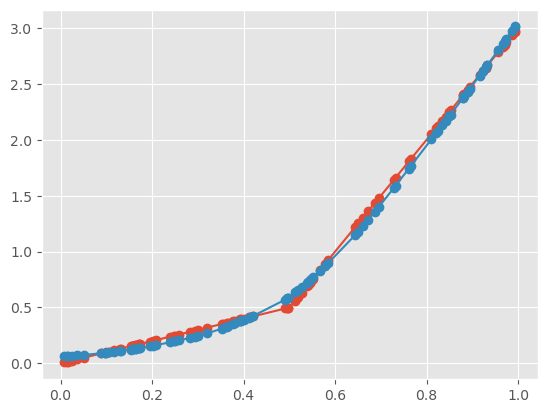

In [31]:
y_hat3 = pred(X,y,K3)
plt.plot(X,y, '-o') #in red
plt.plot(X,y_hat.values, '-o') # in blue

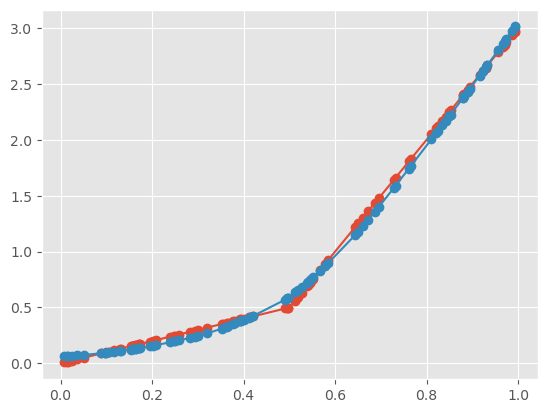

In [32]:
y_hat4 = pred(X,y,K4)
plt.plot(X,y, '-o') #in red
plt.plot(X,y_hat.values, '-o') # in blue

To actually use this function and show the fits of each kernel, we can iterate over all the kernels and fit the LOESS model for each of them.

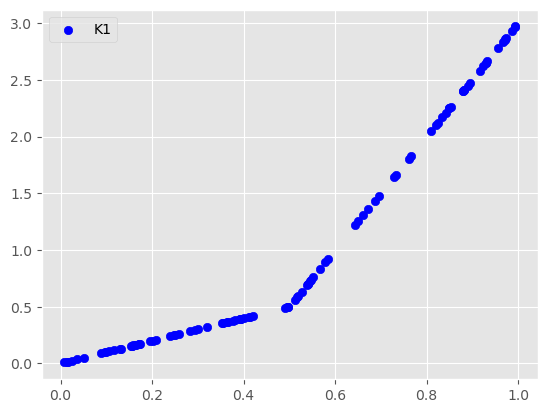

In [19]:
from functools import partial # You may want to use this to make your life easier.
plt.scatter(X, y, c='b')
for kernel in [K1, K2, K3, K4]:
    
    
# Adding a legend so we know which kernel produced what is good style.
plt.legend(['K1', 'K2', 'K3', 'K4'])

We see...